In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
df=pd.read_csv(r"C:\\Users\\USER\\Downloads\\Desktop\\ML\\ML\\dataset\\Social_Network_Ads.csv")
df.drop(["User ID", "Gender"], axis=1, inplace=True)
df.head(),df.isnull().sum(),df.shape

(   Age  EstimatedSalary  Purchased
 0   19            19000          0
 1   35            20000          0
 2   26            43000          0
 3   27            57000          0
 4   19            76000          0,
 Age                0
 EstimatedSalary    0
 Purchased          0
 dtype: int64,
 (400, 3))

In [24]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

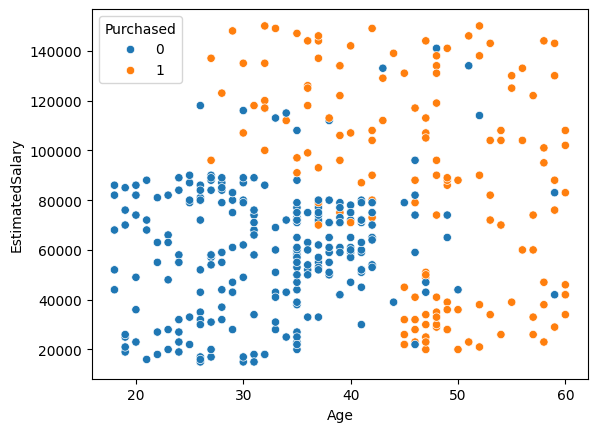

In [25]:
sns.scatterplot(x="Age", y="EstimatedSalary", hue="Purchased", data=df)

In [26]:
x=df.iloc[:,:-1]
y=df["Purchased"]


In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=6)

In [44]:
knn.score(x_test,y_test)*100

90.0

In [45]:
knn.score(x_train,y_train)*100

90.9375

In [40]:
for i in range(1,30):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    print(i,knn1.score(x_test,y_test)*100,knn1.score(x_train,y_train)*100)
    #if testing accruracy is more than training accuracy then we can say that it is overfitting
    #`if training accuracy is more than testing accuracy then we can say that it is underfitting

1 85.0 99.6875
2 86.25 91.5625
3 91.25 92.5
4 92.5 91.875
5 92.5 90.9375
6 90.0 90.9375
7 93.75 91.875
8 92.5 90.625
9 93.75 91.25
10 92.5 90.625
11 92.5 90.9375
12 92.5 91.25
13 92.5 91.5625
14 92.5 90.625
15 92.5 90.625
16 92.5 90.0
17 92.5 90.625
18 92.5 90.0
19 92.5 90.9375
20 93.75 90.0
21 92.5 90.3125
22 93.75 90.0
23 93.75 90.3125
24 93.75 89.375
25 93.75 90.0
26 93.75 89.375
27 92.5 89.375
28 93.75 88.75
29 93.75 88.75


In [49]:
x,y

(          Age  EstimatedSalary
 0   -1.781797        -1.490046
 1   -0.253587        -1.460681
 2   -1.113206        -0.785290
 3   -1.017692        -0.374182
 4   -1.781797         0.183751
 ..        ...              ...
 395  0.797057        -0.844019
 396  1.274623        -1.372587
 397  1.179110        -1.460681
 398 -0.158074        -1.078938
 399  1.083596        -0.990844
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [50]:
knn.predict([[-1.017692,-0.374182]])


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [52]:
from mlxtend.plotting import plot_decision_regions


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

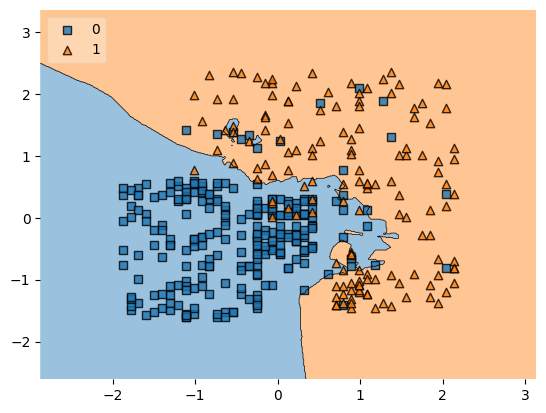

In [53]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn,legend=2)-
